## **DATASET**:User_Data

El conjunto de datos contiene información sobre usuarios potenciales de un producto o servicio. Contiene cuatro características de entrada: ID de usuario, Género, Edad y Salario estimado, que se utilizan para predecir si el usuario compró el producto, indicado por la columna de salida o destino "Comprado".
El ID de usuario es un identificador único asignado a cada usuario, mientras que el Género es el género del usuario, que puede ser masculino o femenino. La Edad es la edad del usuario en años y el Salario estimado es una estimación de su salario anual.
El conjunto de datos puede utilizarse en tareas de clasificación binaria para determinar si es probable que un usuario compre un producto o servicio en particular. Las características proporcionadas podrían utilizarse para crear un modelo que prediga la probabilidad de que un usuario compre el producto en función de su edad, género y salario estimado.

La regresión logística es una herramienta estadística para predecir la probabilidad de que ocurra un evento, basándose en variables independientes. Se usa principalmente para problemas de clasificación donde la variable de resultado es categórica, especialmente binaria (dos posibles resultados como sí/no, 0/1). Su aplicación incluye análisis explicativos y predictivos en campos como la medicina, epidemiología, finanzas y detección de fraudes.

## Características principales   
    1. Predicción: Estima la probabilidad de que una variable dependiente pertenezca a una categoría específica.
    2. Resultados binarios: Es especialmente útil cuando la variable de resultado solo puede tomar dos valores (es una variable dicotómica o binomial).
    3. Función logística (logit): Utiliza una función logística para modelar la relación, lo que resulta en una curva en forma de "S" y asegura que la predicción de la probabilidad siempre esté entre 0 y 1).
    4. Análisis de múltiples variables: Puede analizar el efecto de varias variables independientes (cuantitativas o cualitativas) sobre la variable    dependiente.
    5. Función explicativa: Permite entender cómo las variables independientes


influyen en la probabilidad del resultado.

    # Si desea saber mas lo invito a leer: https://www.ibm.com/mx-es/think/topics/logistic-regression

# **1. Importar librerias y dataset**

In [1]:
#Importar la libreria
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings("ignore")

In [2]:
#Importar dataset
dataUser = pd.read_csv('C:/Users/diaza/OneDrive/Escritorio/UserData.csv')

In [3]:
#Visualizar los datos del dataset
dataUser.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


# **2. Extraccion de las columnas Edad y Salario**

In [5]:
#Extraccion de datos Edad y Salario estimado
x = dataUser.iloc[:,[2,3]].values
x 

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [6]:
#Extraccion de la columna Compras
y = dataUser.iloc[:,4].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
#Visualizacion de datos Edad y Salario estimado

In [ ]:
#Visualizacion de la columna Compras


# **3. Creacion del modelo**

In [7]:
#Importar la libreria de division de datos
from sklearn.model_selection import train_test_split

In [8]:
#Dividir los datos en datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [11]:
#Importar la libreria StandardScaler, una clase que normaliza o estandariza los datos, estandarizar significa transformar los valores para que tengan media 0 y desviación estándar 1
from sklearn.preprocessing import StandardScaler

In [13]:
#Crea una instancia del escalador, este objeto se usará para ajustar los parámetros de escalado (media y desviación estándar) y transformar los datos.
st_x = StandardScaler()

In [14]:
# Se ajusta el escalador con los datos de entrenamiento (fit) y los transforma (transform), esto garantiza que el escalado se base únicamente en los datos de entrenamiento
x_train = st_x.fit_transform(x_train)

In [15]:
# Aplica el mismo escalado calculado en x_train a los datos de prueba, asegurando coherencia entre ambos conjuntos
x_test = st_x.transform(x_test)

In [16]:
# Importa la clase LogisticRegression, un modelo de clasificación supervisada muy utilizado para problemas binarios (como “compra” vs “no compra”)
from sklearn.linear_model import LogisticRegression

In [18]:
# Crea una instancia del modelo de Regresión Logística, que servirá como clasificador (clf)
clf = LogisticRegression()

In [19]:
# Entrena (ajusta) el modelo con los datos de entrenamiento, el algoritmo encuentra los coeficientes óptimos que relacionan las variables (Edad, Salario) con la probabilidad de compra.
clf.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
# Utiliza el modelo entrenado para predecir las etiquetas (comprará o no) del conjunto de prueba, y_pred almacena las predicciones del modelo.
y_pred = clf.predict(x_test)

In [21]:
#Muestra el vector de predicciones realizadas por el modelo sobre los datos de prueba
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0])

# **4. Metricas del modelo**

In [23]:
# Importa la función confusion_matrix, que se utiliza para evaluar el rendimiento de un modelo de clasificación comparando las predicciones con las etiquetas reales.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [24]:
#Muestra la matriz de confusión, permitiendo visualizar cuántas predicciones fueron correctas e incorrectas.
cm

array([[49,  1],
       [ 8, 22]])

1. 47: Personas que NO compran y fueron correctamente identificadas
2. 3: Personas que NO compran pero el modelo dijo que SÍ comprarían (falsos positivos)
3. 16: Personas que SÍ compran pero el modelo dijo que NO comprarían (falsos negativos)
4. 14: Personas que SÍ compran y fueron correctamente identificadas

El modelo es mejor identificando a quienes NO compran, pero tiene dificultad detectando a quienes SÍ compran (muchos falsos negativos).

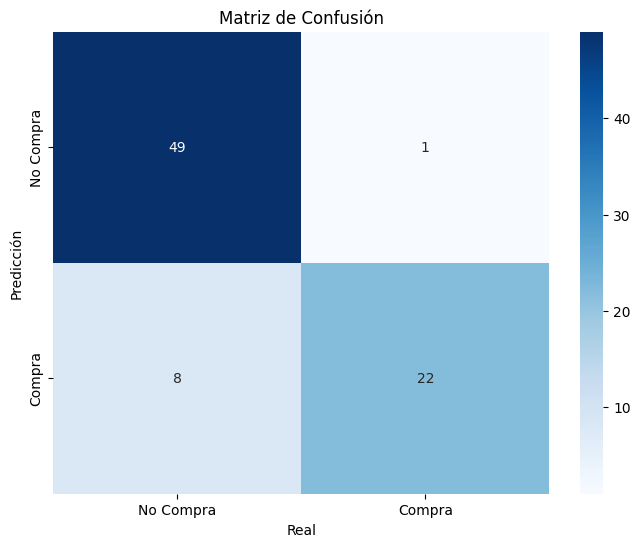


=== ANÁLISIS MATRIZ DE CONFUSIÓN ===
Verdaderos Negativos (TN): 49
Falsos Positivos (FP): 1
Falsos Negativos (FN): 8
Verdaderos Positivos (TP): 22


In [26]:
# Visualización de la matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

# Visualización mejorada de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Compra', 'Compra'],
            yticklabels=['No Compra', 'Compra'])
plt.title('Matriz de Confusión')
plt.ylabel('Predicción')
plt.xlabel('Real')
plt.show()
# Análisis de la matriz de confusión
tn, fp, fn, tp = cm.ravel()
print(f"\n=== ANÁLISIS MATRIZ DE CONFUSIÓN ===")
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdaderos Positivos (TP): {tp}")

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Métricas básicas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Metricas de clasificacion")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Reporte detallado
print("\nReporte de clasificación")
print(classification_report(y_test, y_pred, target_names=['No Compra', 'Compra']))

Metricas de clasificacion
Accuracy: 0.8875 (88.75%)
Precision: 0.9565
Recall: 0.7333
F1-Score: 0.8302

Reporte de clasificación
              precision    recall  f1-score   support

   No Compra       0.86      0.98      0.92        50
      Compra       0.96      0.73      0.83        30

    accuracy                           0.89        80
   macro avg       0.91      0.86      0.87        80
weighted avg       0.90      0.89      0.88        80



**Accuracy:** 76.25% --> El modelo acierta 76 de cada 100 predicciones

**Precision:** 82.35% --> Cuando el modelo dice "SÍ compra", acierta 82% de las veces

**Recall:** 46.67% --> El modelo solo detecta 47% de los clientes que REALMENTE compran, Se le escapan más de la mitad de los compradores reales

**F1-Score:** 59.57% --> Puntuación balanceada media-baja, refleja el problema del recall bajo


Es bueno identificando quién NO comprará (94% de acierto), pero es muy cauteloso para predecir quién SÍ comprará, y se pierde 53% de tus clientes potenciales"

**La curva ROC**

La curva ROC en machine learning es una gráfica que evalúa el rendimiento de un modelo de clasificación binaria al mostrar la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) a través de diferentes umbrales de decisión. Sirve para evaluar qué tan bien un modelo puede distinguir entre dos clases (por ejemplo, positivo vs. negativo), donde una curva cercana a la esquina superior izquierda indica un mejor rendimiento.

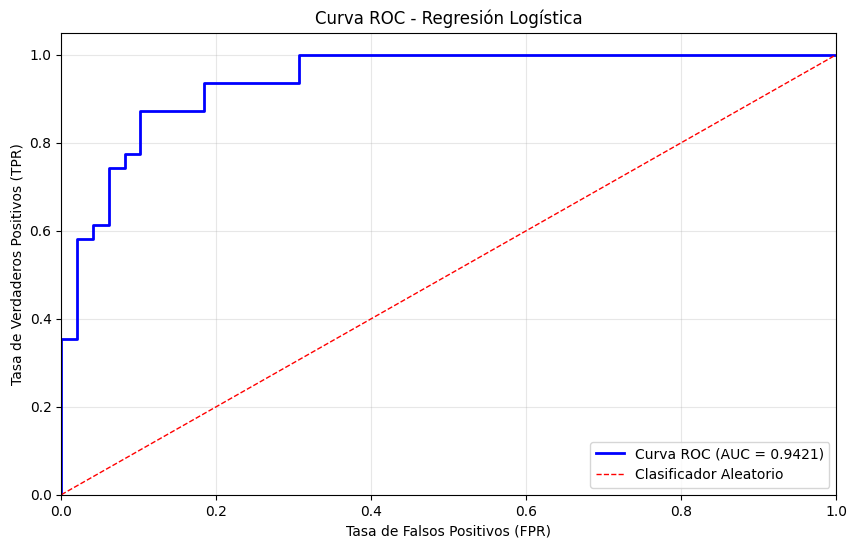

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades predichas (no solo las clases)
y_pred_proba = clf.predict_proba(x_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Clasificador Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

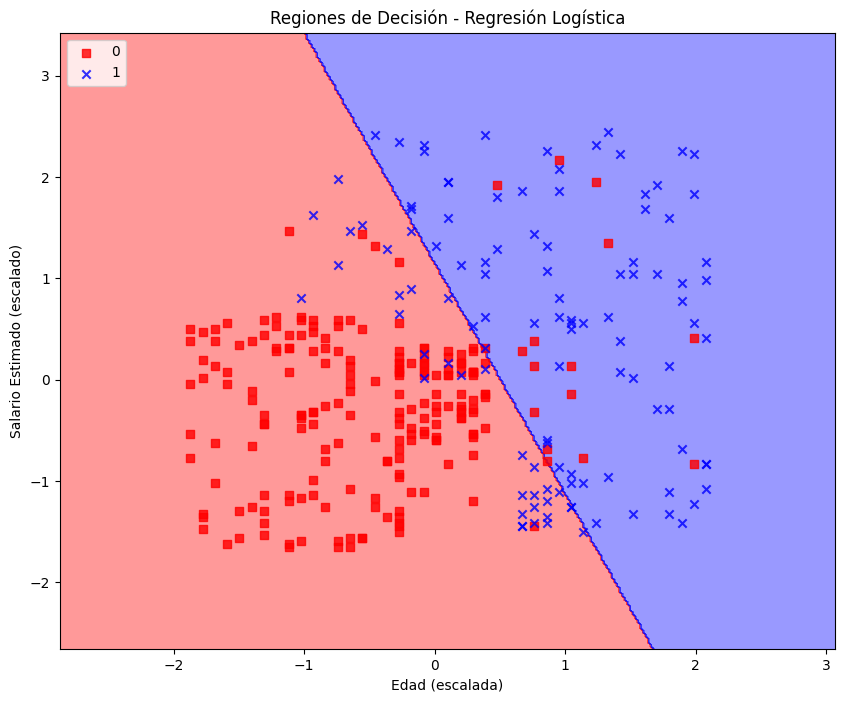

In [ ]:
# Visualización de las regiones de decisión
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Configurar generador de marcadores y mapa de colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    # Mapa de colores
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Graficar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Graficar muestras de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=cl)

    plt.xlabel('Edad (escalada)')
    plt.ylabel('Salario Estimado (escalado)')
    plt.legend(loc='upper left')
    plt.title('Regiones de Decisión - Regresión Logística')

plt.figure(figsize=(10, 8))
plot_decision_regions(x_train, y_train, classifier=clf)
plt.show()

In [ ]:
# Función para hacer predicciones con nuevos datos
def predecir_compra(edad, salario):
    """
    Predice si un usuario comprará basado en edad y salario
    """
    # Escalar los nuevos datos
    nuevo_dato = np.array([[edad, salario]])
    nuevo_dato_escalado = st_x.transform(nuevo_dato)

    # Predecir clase y probabilidad
    clase_predicha = clf.predict(nuevo_dato_escalado)[0]
    probabilidad = clf.predict_proba(nuevo_dato_escalado)[0][1]

    return clase_predicha, probabilidad

# Ejemplos de predicción
print("\n=== PREDICCIONES CON NUEVOS DATOS ===")
ejemplos = [(25, 40000), (35, 80000), (45, 120000), (30, 30000)]

for edad, salario in ejemplos:
    clase, prob = predecir_compra(edad, salario)
    decision = "COMPRARÁ" if clase == 1 else "NO COMPRARÁ"
    print(f"Edad: {edad}, Salario: ${salario:,} {decision} (prob: {prob:.2%})")


=== PREDICCIONES CON NUEVOS DATOS ===
Edad: 25, Salario: $40,000 NO COMPRARÁ (prob: 1.01%)
Edad: 35, Salario: $80,000 NO COMPRARÁ (prob: 20.05%)
Edad: 45, Salario: $120,000 COMPRARÁ (prob: 86.03%)
Edad: 30, Salario: $30,000 NO COMPRARÁ (prob: 2.08%)


In [ ]:
import joblib

# Guardar modelo y scaler
joblib.dump(clf, 'modelo_regresion_logistica.pkl')
joblib.dump(st_x, 'scaler.pkl')

print("Modelo guardado como 'modelo_regresion_logistica.pkl'")
print("Scaler guardado como 'scaler.pkl'")

Modelo guardado como 'modelo_regresion_logistica.pkl'
Scaler guardado como 'scaler.pkl'


In [ ]:
import joblib
import pandas as pd
import numpy as np

# Cargar el modelo y el scaler guardados
modelo_cargado = joblib.load('modelo_regresion_logistica.pkl')
scaler_cargado = joblib.load('scaler.pkl')

print("Modelo y scaler cargados exitosamente")

# Función para hacer predicciones con el modelo cargado
def predecir_cliente(edad, salario):
    """
    Función para predecir si un cliente comprará basado en edad y salario
    """
    # Crear array con los datos del nuevo cliente
    nuevo_cliente = np.array([[edad, salario]])

    # Escalar los datos (IMPORTANTE: usar el mismo scaler)
    nuevo_cliente_escalado = scaler_cargado.transform(nuevo_cliente)

    # Predecir
    prediccion = modelo_cargado.predict(nuevo_cliente_escalado)[0]
    probabilidad = modelo_cargado.predict_proba(nuevo_cliente_escalado)[0][1]

    return prediccion, probabilidad

# Probar la función
print("\nPROBANDO EL MODELO CARGADO:")
test_cases = [
    (25, 40000),
    (35, 80000),
    (45, 120000),
    (30, 30000),
    (40, 60000)
]

for edad, salario in test_cases:
    clase, prob = predecir_cliente(edad, salario)
    resultado = "COMPRARÁ" if clase == 1 else "NO COMPRARÁ"
    print(f"Edad: {edad:2d}, Salario: ${salario:>8,} {resultado} (Confianza: {prob:.1%})")

Modelo y scaler cargados exitosamente

PROBANDO EL MODELO CARGADO:
Edad: 25, Salario: $  40,000 NO COMPRARÁ (Confianza: 1.0%)
Edad: 35, Salario: $  80,000 NO COMPRARÁ (Confianza: 20.0%)
Edad: 45, Salario: $ 120,000 COMPRARÁ (Confianza: 86.0%)
Edad: 30, Salario: $  30,000 NO COMPRARÁ (Confianza: 2.1%)
Edad: 40, Salario: $  60,000 NO COMPRARÁ (Confianza: 28.1%)


In [ ]:
# Sistema con análisis de confianza
class SistemaRecomendacion:
    def __init__(self, modelo_path, scaler_path):
        self.modelo = joblib.load(modelo_path)
        self.scaler = joblib.load(scaler_path)
        self.umbral_confianza = 0.6  # Umbral mínimo de confianza

    def analizar_cliente(self, edad, salario, nombre=""):
        # Preparar datos
        datos_cliente = np.array([[edad, salario]])
        datos_escalados = self.scaler.transform(datos_cliente)

        # Predecir
        prediccion = self.modelo.predict(datos_escalados)[0]
        probabilidades = self.modelo.predict_proba(datos_escalados)[0]
        confianza = max(probabilidades)

        # Determinar recomendación
        if prediccion == 1 and confianza >= self.umbral_confianza:
            recomendacion = "CLIENTE PROMETEDOR - Invertir en marketing"
            accion = "Contactar con ofertas personalizadas"
        elif prediccion == 1 and confianza < self.umbral_confianza:
            recomendacion = "CLIENTE POTENCIAL - Monitorear"
            accion = "Enviar comunicaciones generales"
        else:
            recomendacion = "CLIENTE ESTÁNDAR - Mantener contacto básico"
            accion = "Incluir en mailing list general"

        return {
            'nombre': nombre,
            'edad': edad,
            'salario': salario,
            'prediccion': prediccion,
            'probabilidad_compra': probabilidades[1],
            'confianza': confianza,
            'recomendacion': recomendacion,
            'accion': accion
        }

    def analizar_lote_clientes(self, lista_clientes):
        resultados = []
        for cliente in lista_clientes:
            resultado = self.analizar_cliente(**cliente)
            resultados.append(resultado)
        return resultados

# Usar el sistema
print("\nSISTEMA DE RECOMENDACIÓN EN TIEMPO REAL")
print("=" * 50)

sistema = SistemaRecomendacion('modelo_regresion_logistica.pkl', 'scaler.pkl')

# Analizar múltiples clientes
clientes = [
    {'nombre': 'Juan Pérez', 'edad': 28, 'salario': 45000},
    {'nombre': 'María García', 'edad': 42, 'salario': 95000},
    {'nombre': 'Carlos López', 'edad': 35, 'salario': 55000},
    {'nombre': 'Ana Martínez', 'edad': 51, 'salario': 120000},
    {'nombre': 'Pedro Rodríguez', 'edad': 23, 'salario': 28000}
]

resultados = sistema.analizar_lote_clientes(clientes)

for resultado in resultados:
    print(f"\nCliente: {resultado['nombre']}")
    print(f"   Edad: {resultado['edad']}, Salario: ${resultado['salario']:,}")
    print(f"   Probabilidad de compra: {resultado['probabilidad_compra']:.1%}")
    print(f"   {resultado['recomendacion']}")
    print(f"   Acción: {resultado['accion']}")


SISTEMA DE RECOMENDACIÓN EN TIEMPO REAL

Cliente: Juan Pérez
   Edad: 28, Salario: $45,000
   Probabilidad de compra: 2.1%
   CLIENTE ESTÁNDAR - Mantener contacto básico
   Acción: Incluir en mailing list general

Cliente: María García
   Edad: 42, Salario: $95,000
   Probabilidad de compra: 61.8%
   CLIENTE PROMETEDOR - Invertir en marketing
   Acción: Contactar con ofertas personalizadas

Cliente: Carlos López
   Edad: 35, Salario: $55,000
   Probabilidad de compra: 10.8%
   CLIENTE ESTÁNDAR - Mantener contacto básico
   Acción: Incluir en mailing list general

Cliente: Ana Martínez
   Edad: 51, Salario: $120,000
   Probabilidad de compra: 95.4%
   CLIENTE PROMETEDOR - Invertir en marketing
   Acción: Contactar con ofertas personalizadas

Cliente: Pedro Rodríguez
   Edad: 23, Salario: $28,000
   Probabilidad de compra: 0.5%
   CLIENTE ESTÁNDAR - Mantener contacto básico
   Acción: Incluir en mailing list general
